In [10]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import re
import convsep.util as util
from phase_transform import PhaseTransform, transformFFT
from scipy.signal import blackmanharris, gaussian
from scipy.io import wavfile
from tqdm import tqdm
import matplotlib.pyplot as plt


db = '../DSD100subset'
feature_path = 'results/features'

os.makedirs(feature_path, exist_ok=True)
    
mixture_directory = os.path.join(db,'Mixtures')
source_directory = os.path.join(db,'Sources')

sampleRate = 44100
tt = PhaseTransform(frameSize=2048, hopSize=512, 
                    sampleRate=sampleRate, 
                    window=gaussian, std=0.4)


os.makedirs(feature_path, exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
song = "055 - Angels In Amplifiers - I'm Alright"
mixture = os.path.join(mixture_directory, "Dev", song, "mixture.wav")
#read the input audio file
mix_raw, sampleRate, bitrate = util.readAudioScipy(mixture)

# mags, phs = tt.compute_transform(mix_raw, phase=True,
#                                  suffix="in")
from phase_transform import stft_norm
from scipy.signal import stft



In [37]:
X.shape

(129, 15175)

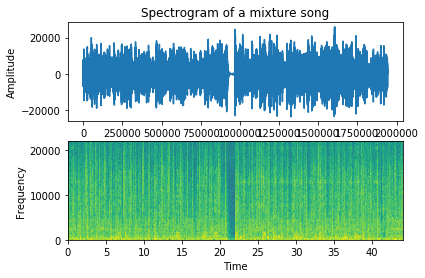

In [19]:
plt.subplot(211)
plt.title('Spectrogram of a mixture song')

samplingFrequency, signalData = wavfile.read(mixture)
plt.plot(signalData[:,0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

 

plt.subplot(212)

plt.specgram(signalData[:,0], Fs=sampleRate)
plt.xlabel('Time')
plt.ylabel('Frequency')

 

plt.show()

In [31]:
X.shape

AttributeError: 'tuple' object has no attribute 'shape'

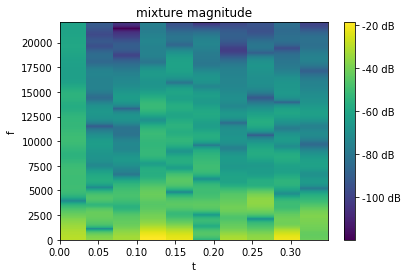

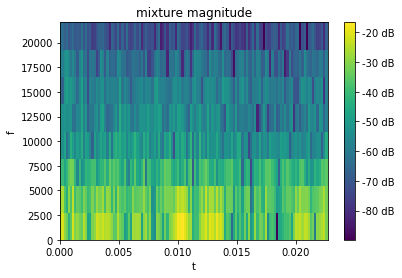

In [67]:
# sources = ['vocals','bass','drums','other']
sources = ['mixture']
n_sources = len(sources)
channels = ['left', 'right']
n_channels = len(channels)

f, t, X = stft(mix_raw[:,0], fs=sampleRate,
              window=('gaussian', 10.), nperseg=2048, noverlap=512)
mags = np.abs(X)
plt.pcolormesh(t[:11], f, 10*np.log(1e-8+np.abs(X[:,:11])))
plt.colorbar(format='%+2.0f dB')
plt.xlabel("t")
plt.ylabel("f")
plt.title("mixture magnitude")
plt.show()


f, t, X = stft(mix_raw[:1000,0], fs=sampleRate,
              window='hann', nperseg=16, noverlap=None)
# window=('gaussian', 50.)
mags = np.abs(X)
plt.pcolormesh(t, f, 10*np.log(1e-8+np.abs(X)))
plt.colorbar(format='%+2.0f dB')
plt.xlabel("t")
plt.ylabel("f")
plt.title("mixture magnitude")
plt.show()

In [14]:
#rest of file

rest=mix_raw[(i+1)*30*sampleRate:]
audio = np.zeros((len(rest),2))
audio[:,0]=rest[:,0]
audio[:,1]=rest[:,1]

#compute the STFT and write the .data file in the subfolder /transform/t1/ of the iKala folder
tt.compute_transform(audio,os.path.join(feature_path,f+"_"+str(i+1)+'.data'),phase=True, suffix="in")
audio = None
rest = None
mix_raw = None

#read the output audio files
vocals, sampleRate, bitrate = util.readAudioScipy(os.path.join(source_directory,"Dev",f,"vocals.wav"))
bass, sampleRate, bitrate = util.readAudioScipy(os.path.join(source_directory,"Dev",f,"bass.wav"))
drums, sampleRate, bitrate = util.readAudioScipy(os.path.join(source_directory,"Dev",f,"drums.wav"))
others, sampleRate, bitrate = util.readAudioScipy(os.path.join(source_directory,"Dev",f,"other.wav"))

#Take chunks of 30 secs
for i in range(number_of_blocks):
    audio = np.zeros((sampleRate*30,8))
    audio[:,0]=vocals[i*sampleRate*30:(i+1)*30*sampleRate,0]
    audio[:,1]=vocals[i*sampleRate*30:(i+1)*30*sampleRate,1]
    audio[:,2]=bass[i*sampleRate*30:(i+1)*sampleRate*30,0]
    audio[:,3]=bass[i*sampleRate*30:(i+1)*sampleRate*30,1]
    audio[:,4]=drums[i*sampleRate*30:(i+1)*sampleRate*30,0]
    audio[:,5]=drums[i*sampleRate*30:(i+1)*sampleRate*30,1]
    audio[:,6]=others[i*sampleRate*30:(i+1)*sampleRate*30,0]
    audio[:,7]=others[i*sampleRate*30:(i+1)*sampleRate*30,1]

    if not os.path.exists(feature_path):
        os.makedirs(feature_path)
    #compute the STFT and write the .data file in the subfolder /transform/feature_folder/ of the DSD100 folder
    tt.compute_transform(audio,os.path.join(feature_path,f+"_"+str(i)+'.data'), phase=True, suffix="out")
    audio = None

#rest of file
rest=vocals[sampleRate*30*(i+1):]
audio = np.zeros((len(rest),8))
audio[:,0]=rest[:,0]
audio[:,1]=vocals[sampleRate*30*(i+1):,1]
audio[:,2]=bass[sampleRate*30*(i+1):,0]
audio[:,3]=bass[sampleRate*30*(i+1):,1]
audio[:,4]=drums[sampleRate*30*(i+1):,0]
audio[:,5]=drums[sampleRate*30*(i+1):,1]
audio[:,6]=others[sampleRate*30*(i+1):,0]
audio[:,7]=others[sampleRate*30*(i+1):,1]

#compute the STFT and write the .data file in the subfolder /transform/feature_folder/ of the DSD100 folder
tt.compute_transform(audio,os.path.join(feature_path,f+"_"+str(i+1)+'.data'),phase=True, suffix="in")
audio = None
rest = None
vocals = None
bass = None
drums = None
others = None

Shape (2586, 1025) (1323000,) (2586, 1025, 2) (2586, 1025)
Shape (2586, 1025) (1323000,) (2586, 1025, 2) (2586, 1025)


FileNotFoundError: [Errno 2] No such file or directory: "results/features/../DSD100subset/Mixtures/Dev/055 - Angels In Amplifiers - I'm Alright_0_in_m_.data"

In [9]:
db

'DSD100subset'